In [1]:
%load_ext autoreload
%autoreload 2

In [3]:
import cv2 as cv
from utils.io_utils import get_images, output_calib_results, draw_detections
from utils.calib_utils import detect_keypoints, to_lists

In [4]:
pattern_size = (8, 6)
edge_length = 0.04
data_path = "/home/konstantin/datasets/bandeja-sequence/2021_02_01_2/2021-02-01-16-17-42/_azure_ir_image_raw"

In [6]:
images = get_images(data_path, period=4)

In [7]:
len(images)

134

In [8]:
results = detect_keypoints(images, pattern_size, edge_length)

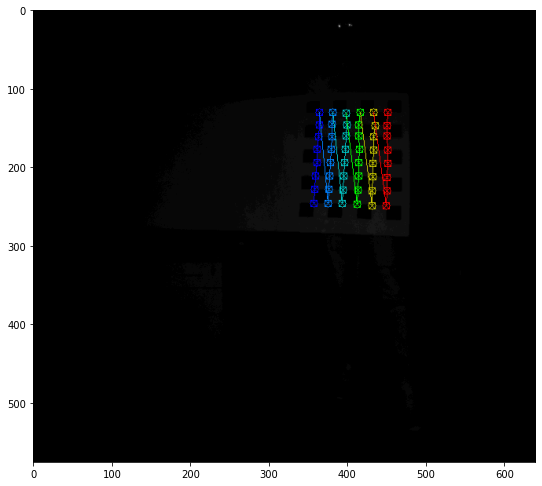

In [9]:
draw_detections(images, results, pattern_size, 0, normalize=True)

In [11]:
criteria = (cv.TERM_CRITERIA_EPS + cv.TERM_CRITERIA_MAX_ITER, 30, 0.0001)

scene_points, loc_kp = to_lists(results)

shape = images[list(images.keys())[0]].shape[::-1][1:]

# Note: K3 dist. coeff. is set to zero, because ros requires 4 distortion parameters. Change if needed.
reproj_error, intrinsics, dist_coeff, _, _ = cv.calibrateCamera(scene_points, loc_kp, shape, None, None, flags=cv.CALIB_FIX_K3, criteria=criteria)

print(reproj_error)

1.4557455201941483


Intrinsics:
[[483.50481564   0.         331.5981001 ]
 [  0.         481.70833129 341.62925503]
 [  0.           0.           1.        ]]
Distortion coefficients:
[[-3.16171895e-01  1.06861428e-01  8.65599671e-06 -2.72664816e-03
   0.00000000e+00]]
Undistored intrinsics: 
[[370.72341919   0.         326.79159129]
 [  0.         370.11895752 344.25938753]
 [  0.           0.           1.        ]]
Saved calibration results as calib_output/azure_intrinsics.npy


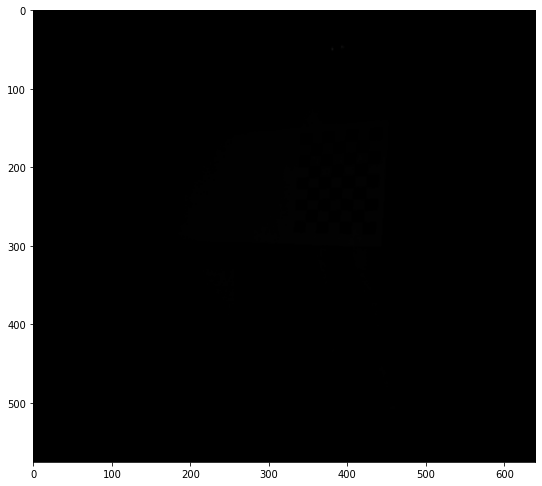

In [14]:
calib_name = 'azure'
output_calib_results(intrinsics, dist_coeff, shape, images, 0, calib_name)